In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#read in data
ca1=pd.read_csv("ca1.csv")
ca2=pd.read_csv("ca2.csv")
ca3=pd.read_csv("ca3.csv")
us1=pd.read_csv("us1.csv")
us2=pd.read_csv("us2.csv")
us3=pd.read_csv("us3.csv")

In [5]:
frames = [ca1,ca2,ca3,us1,us2,us3]

In [6]:
df = pd.concat(frames)

In [7]:
df.tail()

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
11085,40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15.0,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609.0,38160.0,1385.0,2657.0,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
11086,40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22.0,2018-05-18T01:00:06.000Z,[none],1064798.0,60008.0,382.0,3936.0,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
11087,40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24.0,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451.0,48068.0,1032.0,3992.0,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
11088,40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1.0,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813.0,192957.0,2846.0,13088.0,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...
11089,40948,ooyjaVdt-jA,18.14.06,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,20.0,2018-05-17T17:09:38.000Z,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119.0,357079.0,212976.0,144795.0,https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82628 entries, 0 to 11089
Data columns (total 17 columns):
Unnamed: 0                82628 non-null object
video_id                  81830 non-null object
trending_date             81830 non-null object
title                     81830 non-null object
channel_title             81830 non-null object
category_id               81830 non-null float64
publish_time              81830 non-null object
tags                      81830 non-null object
views                     81830 non-null float64
likes                     81830 non-null float64
dislikes                  81830 non-null float64
comment_count             81830 non-null float64
thumbnail_link            81830 non-null object
comments_disabled         81830 non-null object
ratings_disabled          81830 non-null object
video_error_or_removed    81830 non-null object
description               79964 non-null object
dtypes: float64(5), object(12)
memory usage: 11.3+ MB


In [9]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,81830.000000,8.183000e+04,8.183000e+04,8.183000e+04,8.183000e+04
mean,20.383649,1.754415e+06,5.693911e+04,2.861005e+03,6.746303e+03
std,7.194716,5.785451e+06,1.879156e+05,2.455480e+04,3.060427e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,1.781945e+05,3.301000e+03,1.360000e+02,5.050000e+02
50%,24.000000,4.961600e+05,1.283400e+04,4.380000e+02,1.550000e+03
75%,24.000000,1.355388e+06,4.096175e+04,1.421000e+03,4.626000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [10]:

df["title"] = df.title.apply(str)

**Create a new column called "text length" which is the number of words in the title column.**

In [11]:
df['text length'] = df['title'].apply(len)

## Doing the preprocessing work for title, tags and descriptions.

### stem, lemmatize, remove stop word for title.

In [12]:
#clean title
import unicodedata
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer 
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
def clean_customer(a):
    def remove_accented_chars(text):
        text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        return text
    
    text=remove_accented_chars(a)
    

    def clean_title(text):
        text = re.sub(r'[^\w\s]','',text)
        text=word_tokenize(text.lower())
        lemmatizer = WordNetLemmatizer()
        ps = PorterStemmer() 
        text=[lemmatizer.lemmatize(w) for w in text]
        text=[ps.stem(w) for w in text]
        stop_words = set(stopwords.words('english')) 
        filtered_text= [w for w in text if not w in stop_words] 
        filtered_text=" ".join(filtered_text)
        return filtered_text
    
    filtered_text=clean_title(text)
    
    return filtered_text


In [13]:
df["clean_title"]=df.title.apply(lambda x: clean_customer(x) if pd.notnull(x) else x)

### preprocessing tags

In [14]:
#clean tags
import unicodedata
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer 
import re
from nltk.corpus import stopwords

def clean_tags(ticket):
    
    def remove_none(a):
        if a=='[none]':
            a=""
        return a
    text=remove_none(ticket)
    
    
    def remove_accented_chars(text):
        text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        return text
    
    text=remove_accented_chars(text)
    

    def clean_punc(text):
        a=text.lower().split("|")
        punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
        re=[]
        for i in a:
            for x in i:
                if x in punctuations: 
                    i = i.replace(x, "") 
            re.append(i)
        return re
       
         
    
    filtered_text=clean_punc(text)
    
    return filtered_text

In [15]:
df["clean_tag"]=df.tags.apply(lambda x: clean_tags(x) if pd.notnull(x) else x)

In [16]:
df.tail()

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,text length,clean_title,clean_tag
11085,40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15.0,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609.0,38160.0,1385.0,2657.0,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,28,cat caught laser,"[aarons animals, aarons, animals, cat, cats, k..."
11086,40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22.0,2018-05-18T01:00:06.000Z,[none],1064798.0,60008.0,382.0,3936.0,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,26,true fact ant mutual,[]
11087,40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24.0,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451.0,48068.0,1032.0,3992.0,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,84,gave safiya nygaard perfect hair makeov base f...,[i gave safiya nygaard a perfect hair makeover...
11088,40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1.0,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813.0,192957.0,2846.0,13088.0,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,35,black panther end,"[black panther, hishe, marvel, infinity war, h..."
11089,40948,ooyjaVdt-jA,18.14.06,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,20.0,2018-05-17T17:09:38.000Z,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119.0,357079.0,212976.0,144795.0,https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...,64,offici call duti black op 4 multiplay reveal t...,"[call of duty, cod, activision, black ops 4]"


In [17]:
df = df.sort_values('views',ascending=False)

In [18]:
df.dropna()

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,text length,clean_title,clean_tag
8688,38547,VYOjWnS4cMY,18.02.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10.0,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923.0,5023450.0,343541.0,517232.0,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,51,childish gambino thi america offici video,"[childish gambino, rap, this is america, mcdj ..."
8486,38345,VYOjWnS4cMY,18.01.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10.0,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",220490543.0,4962403.0,338105.0,512337.0,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,51,childish gambino thi america offici video,"[childish gambino, rap, this is america, mcdj ..."
8287,38146,VYOjWnS4cMY,18.31.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10.0,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",217750076.0,4934188.0,335462.0,509799.0,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,51,childish gambino thi america offici video,"[childish gambino, rap, this is america, mcdj ..."
8076,37935,VYOjWnS4cMY,18.30.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10.0,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",210338856.0,4836448.0,326902.0,501722.0,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,51,childish gambino thi america offici video,"[childish gambino, rap, this is america, mcdj ..."
7871,37730,VYOjWnS4cMY,18.29.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10.0,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",205643016.0,4776680.0,321493.0,496211.0,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,51,childish gambino thi america offici video,"[childish gambino, rap, this is america, mcdj ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,546,-JVITToppE0,17.16.11,Coach Taggart Monday Presser Ahead of Arizona,GoDucksdotcom,17.0,2017-11-13T20:41:45.000Z,"Oregon|""Ducks""|""college athletics""|""college fo...",687.0,10.0,2.0,5.0,https://i.ytimg.com/vi/-JVITToppE0/default.jpg,False,False,False,Coach Taggart addresses the media ahead of the...,45,coach taggart monday presser ahead arizona,"[oregon, ducks, college athletics, college foo..."
14742,14531,dQMZLXaa1L8,18.27.01,Artwork Forge,Palo Alto Online,17.0,2018-01-10T23:53:56.000Z,[none],658.0,1.0,0.0,0.0,https://i.ytimg.com/vi/dQMZLXaa1L8/default.jpg,False,False,False,Artwork Forge II - an art installation created...,13,artwork forg,[]
14993,14782,y6KYFcta4SE,18.28.01,"1 dead, others injured after Ky. school shooting",Newsy,25.0,2018-01-23T15:30:01.000Z,"shooting|""kentucky""|""breaking news""|""u.s. news...",559.0,9.0,0.0,4.0,https://i.ytimg.com/vi/y6KYFcta4SE/default.jpg,False,False,False,Kentucky Gov. Matt Bevin confirmed there was a...,48,1 dead injur ky school shoot,"[shooting, kentucky, breaking news, us news, m..."
14774,14563,y6KYFcta4SE,18.27.01,"1 dead, others injured after Ky. school shooting",Newsy,25.0,2018-01-23T15:30:01.000Z,"shooting|""kentucky""|""breaking news""|""u.s. news...",554.0,9.0,0.0,4.0,https://i.ytimg.com/vi/y6KYFcta4SE/default.jpg,False,False,False,Kentucky Gov. Matt Bevin confirmed there was a...,48,1 dead injur ky school shoot,"[shooting, kentucky, breaking news, us news, m..."


In [30]:
df['views']

8688    225211923.0
8486    220490543.0
8287    217750076.0
8076    210338856.0
7871    205643016.0
           ...     
6021            NaN
6241            NaN
6242            NaN
6243            NaN
6244            NaN
Name: views, Length: 82623, dtype: float64

In [20]:
def views_interval(views):
    five_start = int(len(df)*0.1)
    four_start = int(len(df)*0.25)
    three_start = int(len(df)*0.3)
    two_start = int(len(df)*0.25)
    one_start = int(len(df)*0.1)
    
    if views >= df['views'].iloc[five_start]:
        return 5
    elif views >= df['views'].iloc[five_start + four_start]:
        return 4
    elif views >= df['views'].iloc[five_start + four_start + three_start]:
        return 3
    elif views >= df['views'].iloc[five_start + four_start + three_start + two_start]:
        return 2
    elif views >= df['views'].iloc[five_start + four_start + three_start + two_start + one_start]:
        return 1
        
    

In [21]:
df['stars'] = df['views'].apply(lambda x: views_interval(x))

In [22]:
df["stars"] = df["stars"].fillna(1)

In [23]:
# df[['stars', 'views']]

In [24]:
df['stars'].value_counts()

3.0    24788
2.0    20657
4.0    20656
5.0     8264
1.0     8263
Name: stars, dtype: int64

In [25]:
df['views'].value_counts()

158013.0      4
385958.0      4
141897.0      4
224270.0      4
608902.0      4
             ..
3483165.0     1
304323.0      1
21977.0       1
184929.0      1
16777231.0    1
Name: views, Length: 75352, dtype: int64

In [26]:
max_views = df['views'].max()

In [27]:
min_views = df['views'].min()

In [28]:
print(max_views)
print(min_views)

225211923.0
549.0


In [ ]:
df.to_csv("new_data3.csv")

# EDA



In [31]:
df.drop_na()

AttributeError: 'DataFrame' object has no attribute 'drop_na'

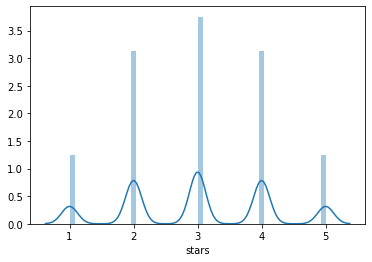

In [26]:
sns.distplot(df['stars'], bins = 50)

**Create a boxplot of text length for each star category.**

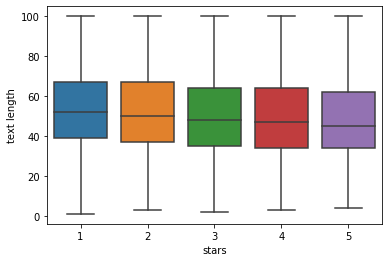

In [27]:
sns.boxplot(x = 'stars', y = 'text length', data = df)

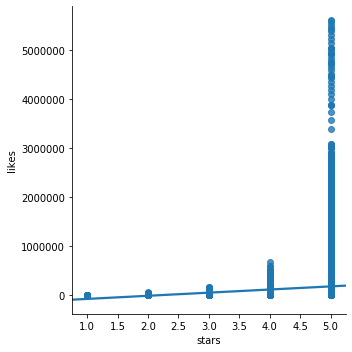

In [28]:
sns.lmplot(x = 'stars', y = 'likes', data = df)

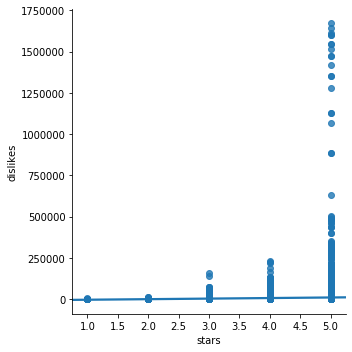

In [29]:
sns.lmplot(x = 'stars', y = 'dislikes', data = df)

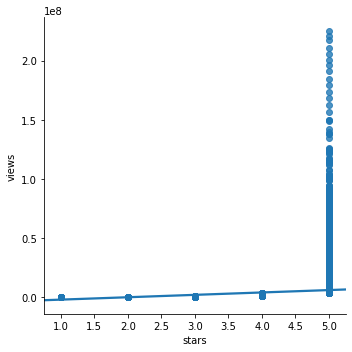

In [30]:
sns.lmplot(x = 'stars', y = 'views', data = df)

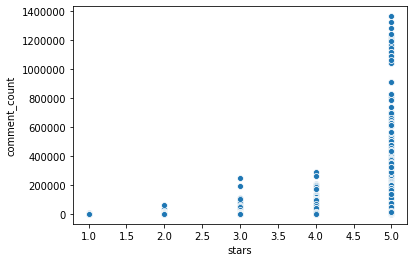

In [31]:
sns.scatterplot(x = 'stars', y = 'comment_count', data = df)

**Create a countplot of the number of occurrences for each type of star rating.**

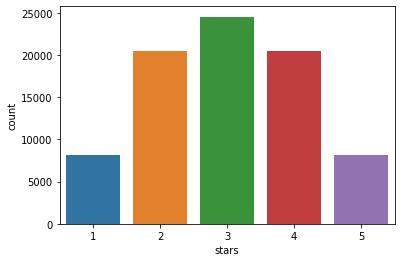

In [32]:
sns.countplot(x = 'stars', data = df)

** Use groupby to get the mean values of the numerical columns, you should be able to create this dataframe with the operation:**

In [33]:
df.groupby('stars').mean()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,text length
stars,,,,,,,,,
1,20.945986,3.054257e+04,927.710620,47.915679,199.726506,0.041061,0.013809,0.000855,53.618111
2,21.425478,1.623282e+05,5576.248424,221.225302,894.965684,0.011048,0.006746,0.000440,52.601603
3,21.183959,5.247334e+05,17862.189050,758.493462,2535.053363,0.008962,0.003422,0.000611,50.799625
4,19.843183,1.718291e+06,62424.759398,2567.001613,7677.527057,0.012367,0.003960,0.000538,49.900523
5,16.167522,1.123660e+07,344836.281036,19313.901026,38222.769062,0.022116,0.003910,0.000978,49.143817


**Use the corr() method on that groupby dataframe to produce this dataframe:**

In [34]:
#df.drop(columns = 'start', inplace = True)

In [35]:
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,text length,stars
category_id,1.000000,-0.157674,-0.164745,-0.033323,-0.075145,0.043849,0.004515,-0.029706,-0.007964,-0.164734
views,-0.157674,1.000000,0.842570,0.487073,0.632034,0.003534,0.008492,-0.001006,-0.037972,0.398762
likes,-0.164745,0.842570,1.000000,0.451168,0.811862,-0.025485,-0.022481,-0.001011,-0.089064,0.387385
dislikes,-0.033323,0.487073,0.451168,1.000000,0.684025,-0.004503,-0.008645,-0.000864,-0.025499,0.158589
comment_count,-0.075145,0.632034,0.811862,0.684025,1.000000,-0.027074,-0.014890,-0.001155,-0.068630,0.266545
comments_disabled,0.043849,0.003534,-0.025485,-0.004503,-0.027074,1.000000,0.222213,-0.003037,0.029202,-0.025072
ratings_disabled,0.004515,0.008492,-0.022481,-0.008645,-0.014890,0.222213,1.000000,-0.001835,0.002880,-0.031812
video_error_or_removed,-0.029706,-0.001006,-0.001011,-0.000864,-0.001155,-0.003037,-0.001835,1.000000,-0.019966,0.001734
text length,-0.007964,-0.037972,-0.089064,-0.025499,-0.068630,0.029202,0.002880,-0.019966,1.000000,-0.065326
stars,-0.164734,0.398762,0.387385,0.158589,0.266545,-0.025072,-0.031812,0.001734,-0.065326,1.000000


In [36]:
df_corr = df.corr()

**Then use seaborn to create a heatmap based off that .corr() dataframe:**

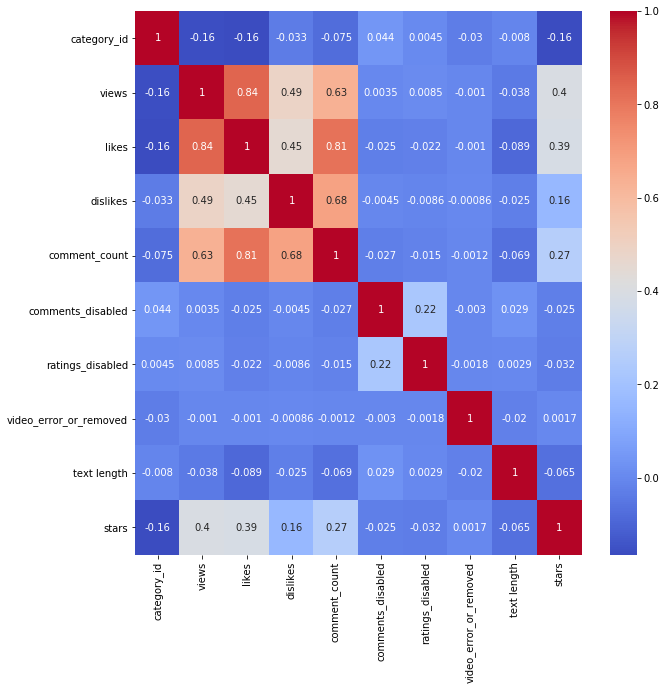

In [37]:
plt.figure(figsize = (10,10))
sns.heatmap(df_corr, cmap = 'coolwarm', annot = True)

# import Clean title data

In [68]:
df = pd.read_csv('new_data3.csv')

In [29]:
df

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,...,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,text length,clean_title,clean_tag,stars
8688,38547,VYOjWnS4cMY,18.02.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10.0,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923.0,5023450.0,...,517232.0,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,51,childish gambino thi america offici video,"[childish gambino, rap, this is america, mcdj ...",5.0
8486,38345,VYOjWnS4cMY,18.01.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10.0,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",220490543.0,4962403.0,...,512337.0,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,51,childish gambino thi america offici video,"[childish gambino, rap, this is america, mcdj ...",5.0
8287,38146,VYOjWnS4cMY,18.31.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10.0,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",217750076.0,4934188.0,...,509799.0,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,51,childish gambino thi america offici video,"[childish gambino, rap, this is america, mcdj ...",5.0
8076,37935,VYOjWnS4cMY,18.30.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10.0,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",210338856.0,4836448.0,...,501722.0,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,51,childish gambino thi america offici video,"[childish gambino, rap, this is america, mcdj ...",5.0
7871,37730,VYOjWnS4cMY,18.29.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10.0,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",205643016.0,4776680.0,...,496211.0,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,51,childish gambino thi america offici video,"[childish gambino, rap, this is america, mcdj ...",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,Follow me on Twitter ► https://twitter.com/mar...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,nan,NaN,1.0
6246,Like me on Facebook ► https://www.facebook.com...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,nan,NaN,1.0
6247,Join us on Reddit! ► https://www.reddit.com/r/...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,nan,NaN,1.0
6248,Horror Outro ► https://soundcloud.com/shurkoff...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,nan,NaN,1.0


In [32]:
df['stars'] = df['views'].apply(lambda x: views_interval(x))

In [33]:
youtube_class = df

In [34]:
youtube_class = youtube_class.dropna()

In [35]:
youtube_class.head()

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,...,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,text length,clean_title,clean_tag,stars
8688,38547,VYOjWnS4cMY,18.02.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10.0,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923.0,5023450.0,...,517232.0,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,51,childish gambino thi america offici video,"[childish gambino, rap, this is america, mcdj ...",5.0
8486,38345,VYOjWnS4cMY,18.01.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10.0,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",220490543.0,4962403.0,...,512337.0,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,51,childish gambino thi america offici video,"[childish gambino, rap, this is america, mcdj ...",5.0
8287,38146,VYOjWnS4cMY,18.31.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10.0,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",217750076.0,4934188.0,...,509799.0,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,51,childish gambino thi america offici video,"[childish gambino, rap, this is america, mcdj ...",5.0
8076,37935,VYOjWnS4cMY,18.30.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10.0,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",210338856.0,4836448.0,...,501722.0,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,51,childish gambino thi america offici video,"[childish gambino, rap, this is america, mcdj ...",5.0
7871,37730,VYOjWnS4cMY,18.29.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10.0,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",205643016.0,4776680.0,...,496211.0,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,False,False,False,“This is America” by Childish Gambino http://s...,51,childish gambino thi america offici video,"[childish gambino, rap, this is america, mcdj ...",5.0


# NLP Classification Task, X variable is " Title"

## first do the classification on the overall data

In [36]:
X = youtube_class['title']
y = youtube_class['stars']

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [39]:
from sklearn.pipeline import Pipeline

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer

In [41]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(youtube_class['title'], youtube_class['stars'], test_size = 0.3, random_state =101)

In [44]:
pipeline.fit(X_train, y_train)

/Users/wangxiaoyan/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0

In [53]:
import pickle

In [54]:
filename = 'finalized_model.sav'
pickle.dump(pipeline, open(filename, 'wb'))

In [47]:
pred_p = pipeline.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

In [49]:
print(confusion_matrix(y_test, pred_p))
print(classification_report(y_test, pred_p))

[[4348 1425  222   30]
 [1168 4855 1208   68]
 [ 204  755 4749  448]
 [  15   17  329 2056]]
              precision    recall  f1-score   support

         2.0       0.76      0.72      0.74      6025
         3.0       0.69      0.67      0.68      7299
         4.0       0.73      0.77      0.75      6156
         5.0       0.79      0.85      0.82      2417

    accuracy                           0.73     21897
   macro avg       0.74      0.75      0.75     21897
weighted avg       0.73      0.73      0.73     21897



# NLP classification using description

## description 

In [50]:
X = youtube_class[['description']]
y = youtube_class['stars']

In [51]:
X.shape

(72987, 1)

In [52]:
y.shape

(72987,)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(youtube_class['description'], youtube_class['stars'], test_size = 0.3, random_state =101)


In [54]:
X_train.shape

(51090,)

In [55]:
y_train.shape

(51090,)

In [56]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0

In [57]:
pred_p = pipeline.predict(X_test)

In [58]:
print(confusion_matrix(y_test, pred_p))
print(classification_report(y_test, pred_p))

[[4403 1429  179   14]
 [1028 5074 1150   47]
 [  99  850 4762  445]
 [  21   20  320 2056]]
              precision    recall  f1-score   support

         2.0       0.79      0.73      0.76      6025
         3.0       0.69      0.70      0.69      7299
         4.0       0.74      0.77      0.76      6156
         5.0       0.80      0.85      0.83      2417

    accuracy                           0.74     21897
   macro avg       0.76      0.76      0.76     21897
weighted avg       0.75      0.74      0.74     21897

